In [2]:
import numpy as np
import pickle
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
x = np.load('data/avg_samples_lda2.npz')['arr_0']

In [4]:
x.shape

(5769, 5)

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


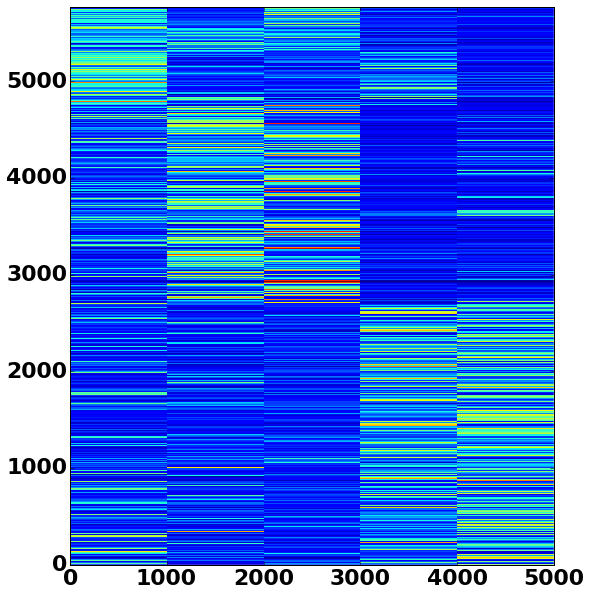

In [5]:
fig, axes = plt.subplots(figsize=(20,10))
axes.imshow(x, extent=[0,5000,0,5769], interpolation='none')

In [6]:
# physics = physics (dynamics) + physics (particle)
# cs = cs + information theory
# q-bio = stats + physics (dynamics)
# stat = cs ( + some stats and information theory)
# q-fin = stats

In [7]:
idx = pickle.load(open('data/ns.pkl', 'r'))

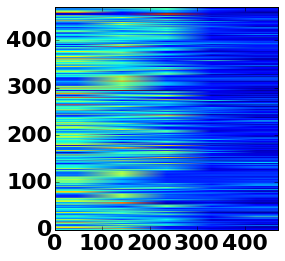

In [8]:
plt.imshow(x[207:207+264,:], extent=[0,207+264,0,207+264], aspect=1)

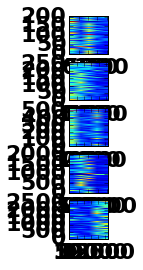

In [9]:
f, axarr = plt.subplots(5)
start_len = [(np.sum(idx[:i]), idx[i]) for i in range(len(idx))] 
for ax, (start, length) in zip(axarr, start_len):
    ax.imshow(x[start:start+length,:], extent=[0,length,0,length], aspect=1)

In [10]:
y = np.load('data/avg_samples_hlda2.npz')['arr_1']

In [11]:
y2 = np.load('data/avg_samples_hlda31.npz')['arr_0']

In [12]:
y2.shape

(5769, 5)

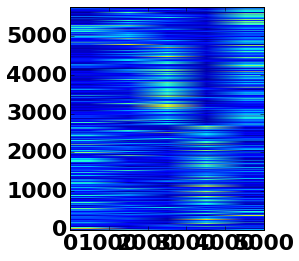

In [13]:
plt.imshow(y[:,:5], extent=[0,5000,0,5769], aspect=1)

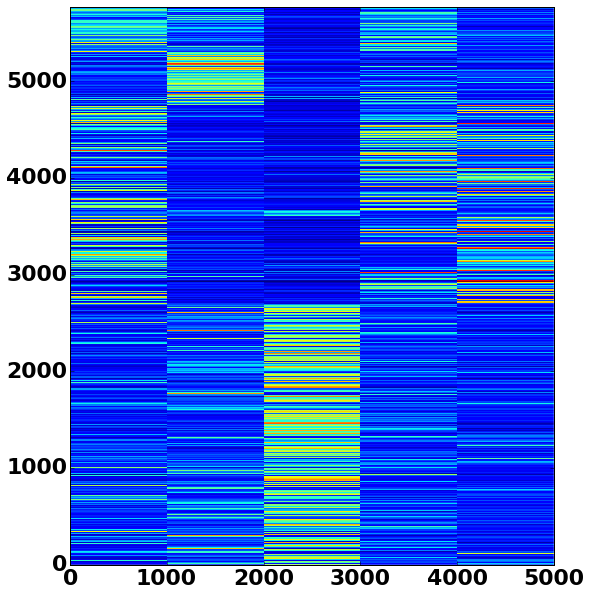

In [14]:
fig, axes = plt.subplots(figsize=(12,10))
axes.imshow(y2, extent=[0,5000,0,5769], aspect=1, interpolation='none')

In [15]:
phi = np.load('data/avg_samples_lda2.npz')['arr_1']
vocab = pickle.load(open('data/vocab.pkl', 'r'))
inv = dict((v, k) for k, v in vocab.iteritems())

axis = 1
index = list(np.ix_(*[np.arange(i) for i in phi.shape]))
index[axis] = phi.argsort(axis)
a = phi[index][:,-20:]
counts = np.rint(a/np.sum(a, axis=1).reshape(-1,1)*1000).tolist()
idx_l = index[axis][:,-20:].tolist()
words = [[inv[i] for i in subl] for subl in idx_l]

In [16]:
words[0]

[u'systems',
 u'statistical',
 u'behavior',
 u'based',
 u'method',
 u'large',
 u'data',
 u'complex',
 u'properties',
 u'distribution',
 u'study',
 u'information',
 u'process',
 u'structure',
 u'different',
 u'analysis',
 u'models',
 u'networks',
 u'network',
 u'model']

In [17]:
words[1]

[u'algorithms',
 u'time',
 u'application',
 u'test',
 u'use',
 u'methods',
 u'present',
 u'set',
 u'using',
 u'problems',
 u'applications',
 u'systems',
 u'problem',
 u'used',
 u'approach',
 u'new',
 u'design',
 u'based',
 u'paper',
 u'data']

In [18]:
words[2]

[u'scheme',
 u'results',
 u'given',
 u'function',
 u'codes',
 u'optimal',
 u'information',
 u'based',
 u'linear',
 u'case',
 u'problem',
 u'paper',
 u'performance',
 u'channel',
 u'power',
 u'rate',
 u'proposed',
 u'algorithm',
 u'time',
 u'number']

In [19]:
words[3]

[u'used',
 u'density',
 u'effect',
 u'dynamics',
 u'cell',
 u'study',
 u'flow',
 u'high',
 u'observed',
 u'potential',
 u'model',
 u'range',
 u'simulations',
 u'states',
 u'effects',
 u'energy',
 u'experimental',
 u'using',
 u'results',
 u'state']

In [20]:
words[4]

[u'particle',
 u'order',
 u'surface',
 u'numerical',
 u'laser',
 u'light',
 u'high',
 u'equations',
 u'dimensional',
 u'equation',
 u'wave',
 u'optical',
 u'method',
 u'frequency',
 u'time',
 u'energy',
 u'space',
 u'quantum',
 u'theory',
 u'field']

In [21]:
# 1 - stats, networks
# 2 - cs (algorithms, applied)
# 3 - information theory
# 4 - physics (dynamics)
# 5 - physics (particle)

In [22]:
for cluster in range(5):
    phi = np.load('data/avg_samples_hlda31.npz')['arr_{}'.format(cluster+6)]
    vocab = pickle.load(open('data/vocab.pkl', 'r'))
    inv = dict((v, k) for k, v in vocab.iteritems())

    axis = 1
    index = list(np.ix_(*[np.arange(i) for i in phi.shape]))
    index[axis] = phi.argsort(axis)
    a = phi[index][:,-20:]
    counts = np.rint(a/np.sum(a, axis=1).reshape(-1,1)*1000).tolist()
    idx_l = index[axis][:,-20:].tolist()
    words = [[inv[i] for i in subl] for subl in idx_l]
    print "\small{"
    print "\\begin{center}"
    print "\\begin{tabular}{ l | l || l | l || l | l || l | l || l | l }"
    print "\\toprule"
    for position in reversed(range(10)):
        row = " & ".join(["{} & {}".format(words[topic_n][position], round(a[topic_n, position],4)) 
                          for topic_n in range(a.shape[0]) ])+" \\\\"
        print row
        #for w, prob in reversed(zip(topic[-10:], freq[-10:])):
        #    print "{} & {} \\\\".format(w,round(prob,4))
    print "\\bottomrule"
    print "\\end{tabular}"
    print "\captionof{{table}}{{\color{{Green}} Topic Cluster {} }}".format(cluster+1)
    print "\\end{center}"
    print "}"
    print

\small{
\begin{center}
\begin{tabular}{ l | l || l | l || l | l || l | l || l | l }
\toprule
work & 0.0125 & propose & 0.0063 & tool & 0.0091 & risk & 0.0077 & presents & 0.0085 \\
modeling & 0.0117 & selection & 0.006 & processing & 0.008 & prediction & 0.0076 & important & 0.0075 \\
level & 0.011 & testing & 0.0058 & available & 0.0078 & price & 0.0076 & technology & 0.007 \\
approaches & 0.0102 & domain & 0.0056 & provide & 0.0078 & science & 0.0076 & view & 0.0068 \\
computer & 0.0088 & virtual & 0.0054 & physics & 0.0075 & particular & 0.0072 & software & 0.0068 \\
context & 0.0084 & accurate & 0.0053 & digital & 0.0073 & financial & 0.0071 & various & 0.0065 \\
tools & 0.0082 & neural & 0.0051 & grid & 0.0073 & main & 0.0064 & web & 0.0063 \\
target & 0.0074 & functional & 0.0051 & application & 0.0071 & empirical & 0.0061 & program & 0.0059 \\
efficient & 0.0073 & methodology & 0.0051 & area & 0.0066 & related & 0.006 & product & 0.0057 \\
community & 0.0068 & regression & 0.005

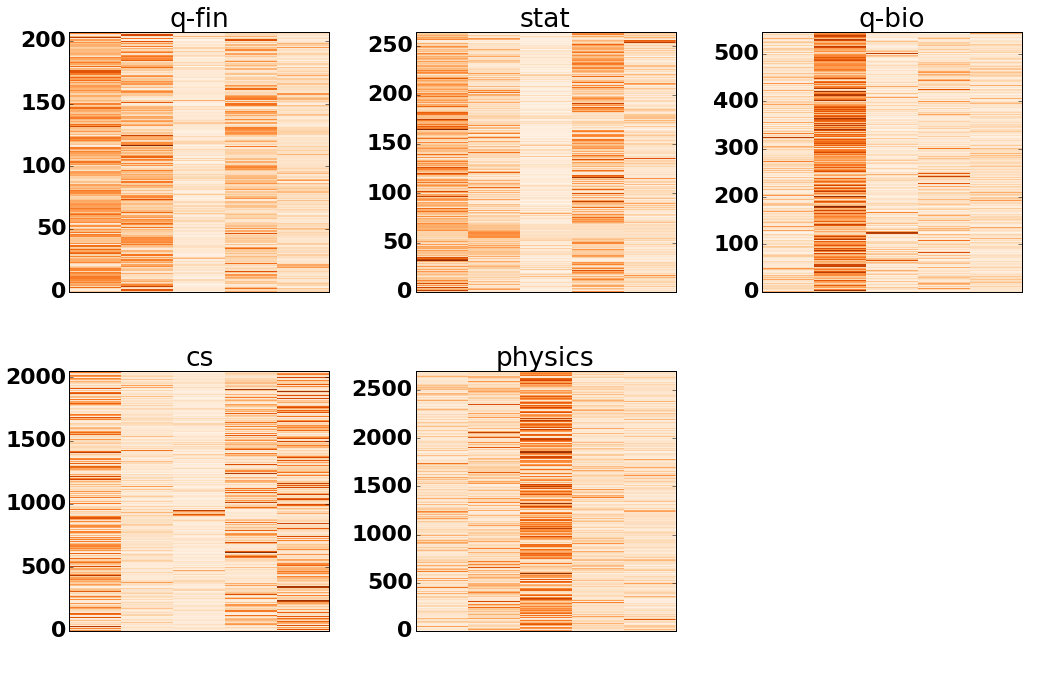

In [28]:
#fig, axes = plt.subplots(figsize=(12,10))
#axes.imshow(y2, extent=[0,5000,0,5769], aspect=1)
f, axarr = plt.subplots(2,3, figsize=(15,10))
start_len = [(np.sum(idx[:i]), idx[i]) for i in range(len(idx))] 
fields = ['q-fin', 'stat', 'q-bio', 'cs', 'physics']
for ax, (start, length), field in zip(axarr.flatten(), start_len, fields):
    ax.imshow(y2[start:start+length,:], extent=[0,length,0,length], aspect=1, interpolation='none', cmap='Oranges')
    ax.get_xaxis().set_visible(False)
    ax.set_title(field)
axarr.flatten()[-1].axis("off")
plt.tight_layout()
plt.savefig('data/heat_fields.pdf', format='pdf')

In [24]:
params = np.load('data/avg_samples_hlda31.npz')

In [25]:
params

In [26]:
l = [ params['arr_{}'.format(i)] for i in range(1,6) ]
t = np.hstack(l)
t.shape    

(5769, 25)

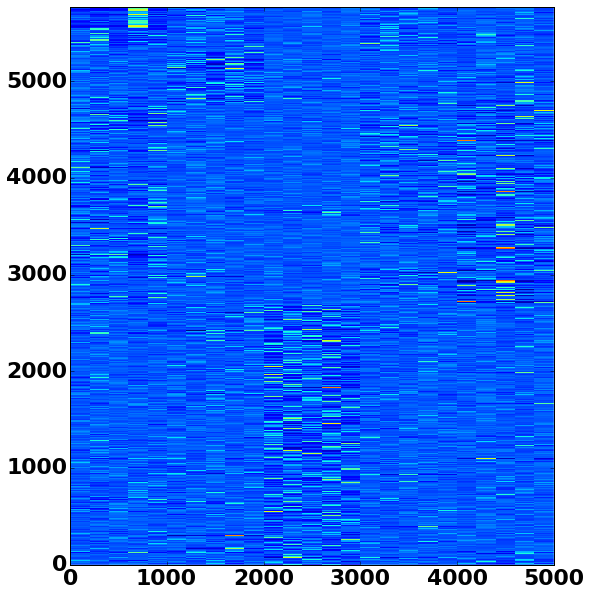

In [27]:
fig, axes = plt.subplots(figsize=(12,10))
axes.imshow(t, extent=[0,5000,0,5769], aspect=1, interpolation='none')